In [1]:
setwd('/import/DB/fel/BJTC-204')

In [3]:
library(dplyr)

In [4]:
load('train1.rda')

In [6]:
nmfinput = data %>%  dplyr::filter(Group == 1)

In [8]:
colnames(data)

[1] "Group" "SNTG2" "TEF"   "WDR72"

In [9]:
nmfinput = nmfinput[,c('SNTG2','TEF','WDR72')] %>% t() 

In [19]:
library(ConsensusClusterPlus)
library(NMF) 

con <- ConsensusClusterPlus(nmfinput, #矩阵形式
                            maxK=10, #最大聚类簇数量
                            reps=100, #抽取的子样本数量
                            pItem=0.8,#抽样样本的比例 
                            pFeature=1,
                            title="resultstrain", #输出文件夹名字
                            clusterAlg="km", #选择聚类算法
                            distance="euclidean", #指定聚类时使用的距离或相关性类型
                            seed=1234, #中子数
                            plot="png", #输出格式 （pdf可能会比较难打开）
                            writeTable=TRUE)

end fraction

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered

clustered



In [20]:
load('bulk.fpkm.fpkm.rda')

In [21]:
head(fpkm,2)

,SL32230,SL32231,SL32242,SL32243,SL32244,SL32245,SL32246,SL32247,SL32248,SL32249,...,SL7403,SL7404,SL7614,SL7625,SL7632,SL7698,SL7801,SL7804,SL7806,SL7807
TSPAN6,0.58212700,1.1090800,0.7174985,1.30327891,0.864194,1.05742769,1.11500779,1.3337105,0.85432657,0.95880247,...,1.38675443,1.58483059,1.6887443,1.83814342,1.2580893,1.24113293,1.03808218,1.04785209,1.3116492,0.76712688
TNMD,0.06472571,0.0480619,0.0582989,0.04994608,0.000000,0.09235754,0.08375255,0.1138411,0.06941658,0.08122485,...,0.09621105,0.09261626,0.1264267,0.01244622,0.0595588,0.08828248,0.04061165,0.04099387,0.0992583,0.08231696


In [24]:
exp = fpkm[,colnames(nmfinput)]

In [28]:
head(exp,2)

,SL32230,SL32231,SL32245,SL32246,SL32247,SL32248,SL5997,SL5998,SL6130,SL6341,...,SL6668,SL6669,SL7154,SL7155,SL7384,SL7403,SL7404,SL7698,SL7801,SL7806
TSPAN6,0.58212700,1.1090800,1.05742769,1.11500779,1.3337105,0.85432657,1.38310421,1.76226925,1.23247231,1.29837623,...,1.40195722,1.24126179,1.10842447,0.99995888,1.26503113,1.38675443,1.58483059,1.24113293,1.03808218,1.3116492
TNMD,0.06472571,0.0480619,0.09235754,0.08375255,0.1138411,0.06941658,0.02390115,0.06446633,0.07492643,0.05805123,...,0.08159073,0.06318703,0.01387634,0.07335037,0.08259309,0.09621105,0.09261626,0.08828248,0.04061165,0.0992583


In [26]:
group1 = read.csv('./resultstrain/resultstrain.k=2.consensusClass.csv',header =F)

In [29]:
group = paste0('subtype',group1$V2)

In [30]:
group_list <- factor(group,levels = c("subtype1","subtype2"),ordered = F)

Warning message:
"package 'limma' was built under R version 4.2.3"

Attaching package: 'limma'


The following object is masked from 'package:BiocGenerics':

    plotMA




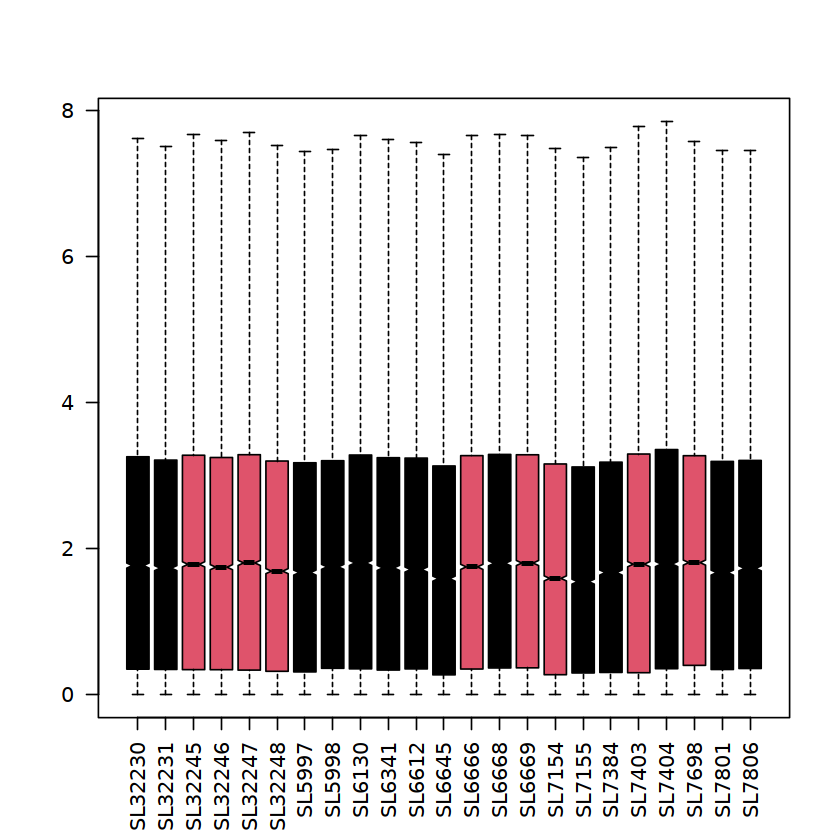

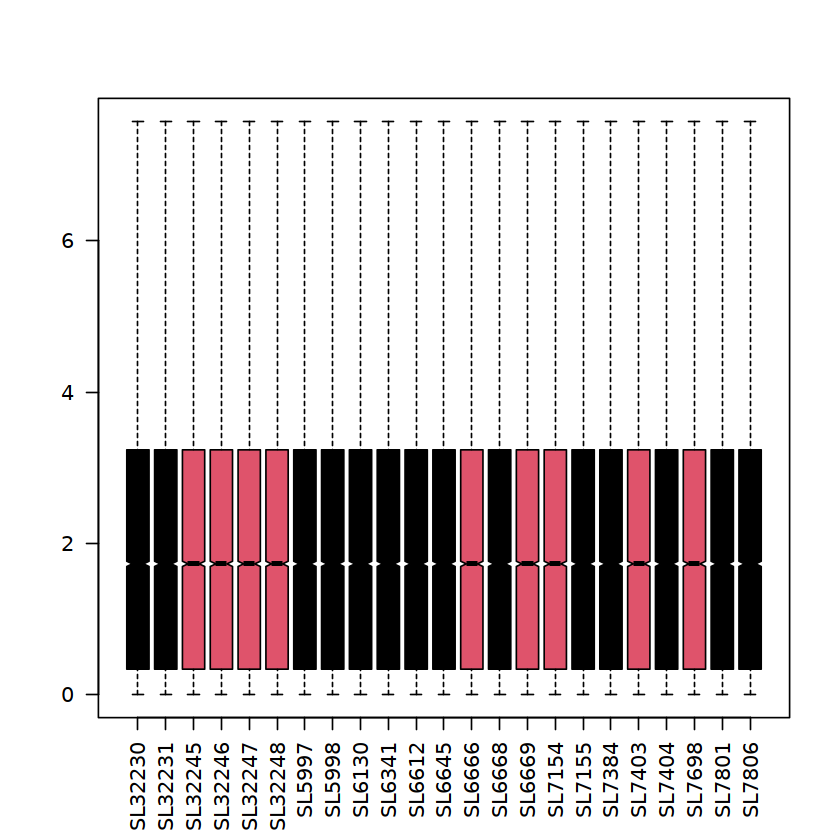

In [31]:
exprSet <- log2(exp+1)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)
library(limma) 
exprSet=normalizeBetweenArrays(exprSet)
boxplot(exprSet,outline=FALSE, notch=T,col=group_list, las=2)

In [32]:
dat <- exprSet
design=model.matrix(~factor( group ))
fit=lmFit(dat,design)
fit=eBayes(fit)
options(digits = 4)
topTable(fit,coef=2,adjust='BH')
bp=function(g){
  library(ggpubr)
  df=data.frame(gene=g,stage=group)
  p <- ggboxplot(df, x = "stage", y = "gene",
                 color = "stage", palette = "jco",
                 add = "jitter")
  #  Add p-value
  p + stat_compare_means()
}
deg=topTable(fit,coef=2,adjust='BH',number = Inf)
head(deg) 

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JADE1,-0.17296,2.69070,-4.493,0.0001807,0.8378,0.78893
OCM2,-0.10637,0.07572,-4.268,0.0003130,0.8378,0.32220
KANK4,0.28173,0.80736,4.221,0.0003509,0.8378,0.22505
TEKT4,0.09000,0.08405,4.098,0.0004738,0.8378,-0.03070
S100A2,-0.09657,0.14963,-4.085,0.0004899,0.8378,-0.05918
LDHAL6B,0.08140,0.07563,4.041,0.0005451,0.8378,-0.15018
SULT2A1,-0.05085,0.03681,-4.032,0.0005563,0.8378,-0.16753
DDX47,0.07262,0.13104,3.921,0.0007303,0.8378,-0.39974
CIB3,-0.09546,0.06110,-3.778,0.0010322,0.8378,-0.69500


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JADE1,-0.17296,2.69070,-4.493,0.0001807,0.8378,0.78893
OCM2,-0.10637,0.07572,-4.268,0.0003130,0.8378,0.32220
KANK4,0.28173,0.80736,4.221,0.0003509,0.8378,0.22505
TEKT4,0.09000,0.08405,4.098,0.0004738,0.8378,-0.03070
S100A2,-0.09657,0.14963,-4.085,0.0004899,0.8378,-0.05918
LDHAL6B,0.08140,0.07563,4.041,0.0005451,0.8378,-0.15018


In [34]:
padj = 0.05
foldChange = 0.2

deg$group = as.factor(ifelse(deg$P.Value < padj & abs(deg$logFC	) > foldChange, 
                                 ifelse(deg$logFC	> foldChange ,'Up','Down'),'NoSignifi'))
table(deg$group)


     Down NoSignifi        Up 
      106     17392        95 

In [35]:
cg = deg %>% dplyr::filter(group != 'NoSignifi') %>%  rownames()
n=exprSet[cg,group1$V1]
group3 = group1$V2
names(group3) = group1$V1
group4 = as.factor(group3)
library(tinyarray)

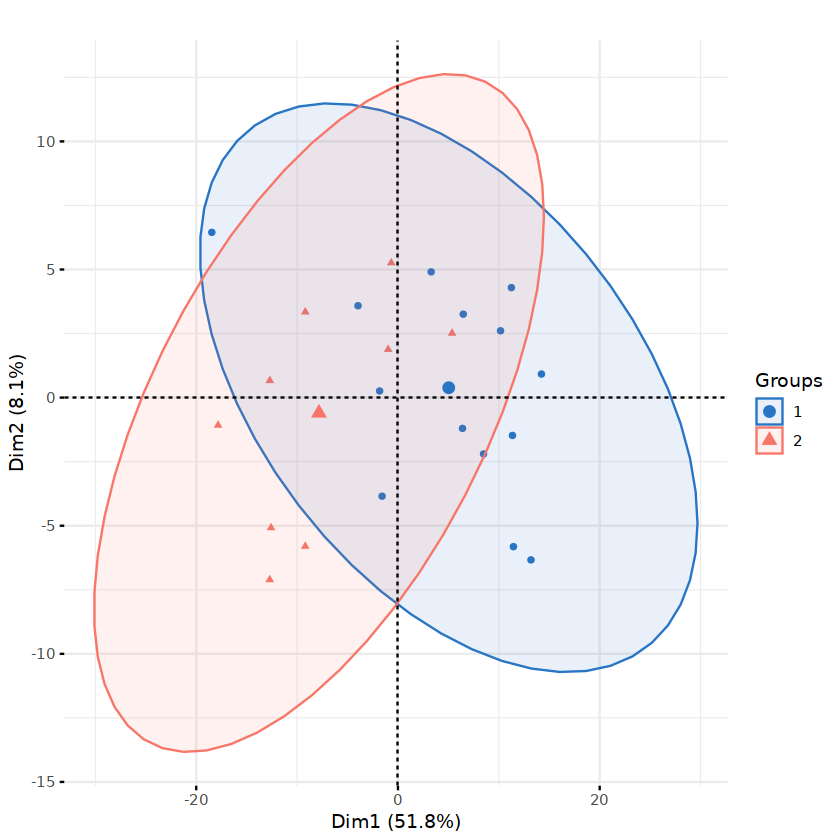

In [36]:
draw_pca(n,group4)

In [37]:
data1 = n

In [39]:
library(pheatmap)
forplot = na.omit(data1)
#forplot = forplot[rowSums(forplot) >100,]
#da=log2(data1+1)
dat=t(scale(t(forplot))) # 'scale'可以对log(fpkm+1)数值进行归一化
#处理数据
dat[dat>2]=2
dat[dat<(-2)]= -2
dim(dat)
dat = dat[complete.cases(dat), ]

Warning message:
"package 'pheatmap' was built under R version 4.2.3"


[1] 201  23

In [40]:
library(pheatmap)
annotation_col = data.frame(group)
colnames(annotation_col) = 'group'
row.names(annotation_col) <- colnames(dat)
head(dat,2)

,SL32230,SL32231,SL32245,SL32246,SL32247,SL32248,SL5997,SL5998,SL6130,SL6341,...,SL6668,SL6669,SL7154,SL7155,SL7384,SL7403,SL7404,SL7698,SL7801,SL7806
KANK4,-1.6984,0.18767,0.6034,1.539,1.7327,0.7370,0.3174,-0.9662,0.4841,0.1241,...,-0.38231,2.0000,-0.6818,-0.5745,-1.052,0.3548,-0.1758,0.3437,-1.3481,-0.8407
TUBG1,0.2394,0.08888,1.2538,1.206,0.6989,0.5424,-1.7529,-1.3496,-2.0000,-0.2832,...,0.02389,0.6846,0.4565,0.4875,-0.190,1.9422,-0.6408,-1.0912,-0.6488,-0.2087


In [42]:
options(repr.plot.width = 6,repr.plot.height = 5)

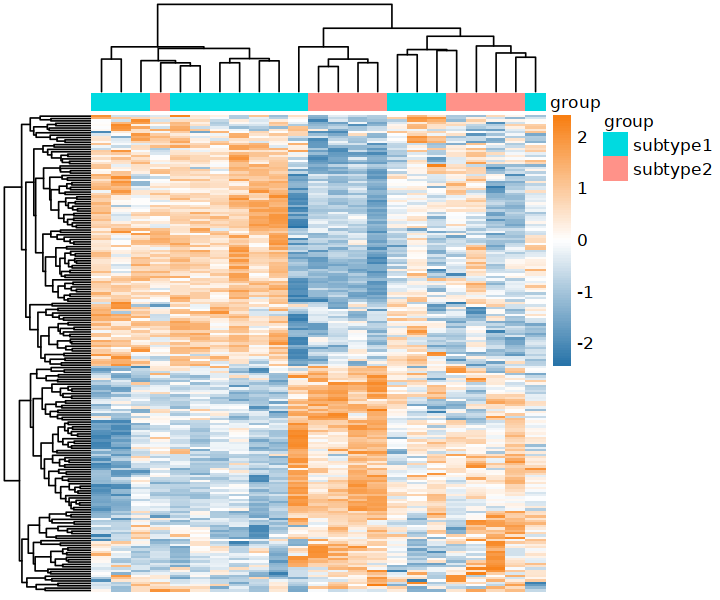

In [43]:
pheatmap(dat,
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         show_rownames=FALSE,
         show_colnames = FALSE,
          scale="row",
        annotation_col = annotation_col,
              #annotation_row = cu.gene,
          #cluster_cols = F,
          fontsize_row = 10,
          fontsize_col = 10,
          #color = colorRampPalette(c("navy", "white", "firebrick3"))(100),
          color = colorRampPalette(c("#2874A9", "white", "#F87F13"))(100)#换颜色
         # angle_col = 45 #修改横轴坐标名倾斜度
)

In [44]:
table(deg$group)


     Down NoSignifi        Up 
      106     17392        95 

In [45]:
deg$symbol=rownames(deg)
  library(ggplot2)
  library(clusterProfiler)
  library(org.Hs.eg.db)
  df <- bitr(unique(deg$symbol), fromType = "SYMBOL",
             toType = c( "ENTREZID"),
             OrgDb = org.Hs.eg.db)
  head(df)
  DEG=deg
  head(DEG)

  DEG=merge(DEG,df,by.y='SYMBOL',by.x='symbol')
  head(DEG)

  save(DEG,file = 'anno_DEG.Rdata')
  gene_up= DEG[DEG$group == 'Up','ENTREZID'] 
  gene_down=DEG[DEG$group == 'Down','ENTREZID'] 
gene_all= DEG[DEG$group == 'NoSignifi','ENTREZID'] 

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
clusterProfiler v4.6.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: 'clusterProfiler'


The following object is masked from 'package:stats':

    filter


Loading required package: AnnotationDbi

Warning message:
"package 'AnnotationDbi' was built under R version 4.2.2"
Loading required package: stats4

Loading required package: IRanges

Warning message:
"package 'IRanges' was built under R version 4.2.3"
Loading required package: S4Vectors

Warning message:
"package 'S4Vectors' was built under R version 4.2.3"

Attaching package: 'S4Vectors'


The following object is masked from 'package:clusterProfiler

,SYMBOL,ENTREZID
,<chr>,<chr>
1,JADE1,79960
2,OCM2,4951
3,KANK4,163782
4,TEKT4,150483
5,S100A2,6273
6,LDHAL6B,92483


,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,symbol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
JADE1,-0.17296,2.69070,-4.493,0.0001807,0.8378,0.78893,NoSignifi,JADE1
OCM2,-0.10637,0.07572,-4.268,0.0003130,0.8378,0.32220,NoSignifi,OCM2
KANK4,0.28173,0.80736,4.221,0.0003509,0.8378,0.22505,Up,KANK4
TEKT4,0.09000,0.08405,4.098,0.0004738,0.8378,-0.03070,NoSignifi,TEKT4
S100A2,-0.09657,0.14963,-4.085,0.0004899,0.8378,-0.05918,NoSignifi,S100A2
LDHAL6B,0.08140,0.07563,4.041,0.0005451,0.8378,-0.15018,NoSignifi,LDHAL6B


,symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B,group,ENTREZID
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
1,A1BG,0.002739,0.37299,0.05912,0.9534,0.9918,-5.814,NoSignifi,1
2,A1CF,-0.003059,0.03433,-0.34780,0.7313,0.9563,-5.758,NoSignifi,29974
3,A2M,-0.072105,5.06664,-0.30289,0.7648,0.9568,-5.772,NoSignifi,2
4,A2ML1,-0.080440,0.54801,-1.49742,0.1485,0.8378,-4.801,NoSignifi,144568
5,A3GALT2,-0.071413,0.22831,-1.25072,0.2242,0.8396,-5.097,NoSignifi,127550
6,A4GALT,0.026241,1.30278,0.15540,0.8779,0.9794,-5.804,NoSignifi,53947


In [46]:
enrichKK <- enrichKEGG(gene         =  gene_all,
                     organism     = 'hsa',
                     #universe     = gene_all,
                     pvalueCutoff = 0.5,
                     qvalueCutoff =0.5)
head(enrichKK)[,1:6] 
enrichKK=DOSE::setReadable(enrichKK, OrgDb='org.Hs.eg.db',keyType='ENTREZID')
enrichKK 

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
hsa05165,hsa05165,Human papillomavirus infection,323/7791,333/8843,3.082e-09,1.051e-06
hsa04151,hsa04151,PI3K-Akt signaling pathway,349/7791,362/8843,1.180e-08,2.012e-06
hsa04010,hsa04010,MAPK signaling pathway,290/7791,300/8843,8.141e-08,8.614e-06
hsa04020,hsa04020,Calcium signaling pathway,247/7791,254/8843,1.010e-07,8.614e-06
hsa05166,hsa05166,Human T-cell leukemia virus 1 infection,217/7791,223/8843,5.159e-07,3.518e-05
hsa04820,hsa04820,Cytoskeleton in muscle cells,225/7791,232/8843,9.411e-07,5.349e-05


#
# over-representation test
#
#...@organism 	 hsa 
#...@ontology 	 KEGG 
#...@keytype 	 ENTREZID 
#...@gene 	 chr [1:17396] "1" "29974" "2" "144568" "127550" "53947" "51146" "8086" ...
#...pvalues adjusted by 'BH' with cutoff <0.5 
#...266 enriched terms found
'data.frame':	266 obs. of  9 variables:
 $ ID         : chr  "hsa05165" "hsa04151" "hsa04010" "hsa04020" ...
 $ Description: chr  "Human papillomavirus infection" "PI3K-Akt signaling pathway" "MAPK signaling pathway" "Calcium signaling pathway" ...
 $ GeneRatio  : chr  "323/7791" "349/7791" "290/7791" "247/7791" ...
 $ BgRatio    : chr  "333/8843" "362/8843" "300/8843" "254/8843" ...
 $ pvalue     : num  3.08e-09 1.18e-08 8.14e-08 1.01e-07 5.16e-07 ...
 $ p.adjust   : num  1.05e-06 2.01e-06 8.61e-06 8.61e-06 3.52e-05 ...
 $ qvalue     : num  5.81e-07 1.11e-06 4.76e-06 4.76e-06 1.94e-05 ...
 $ geneID     : chr  "AKT1/AKT2/AKT3/APC2/ATM/ATP6AP1/ATP6V0A1/ATP6V0A2/ATP6V0A4/ATP6V0B/ATP6V0C/ATP6V0D1/ATP6V0D2/ATP6V0E1/ATP6V0E2/"| __tru

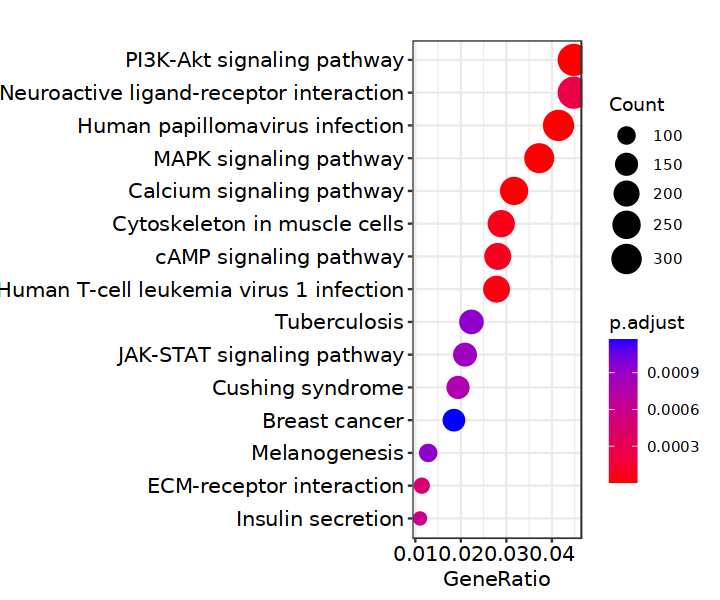

In [47]:
dotplot(enrichKK,showCategory=15,label_format = 100)

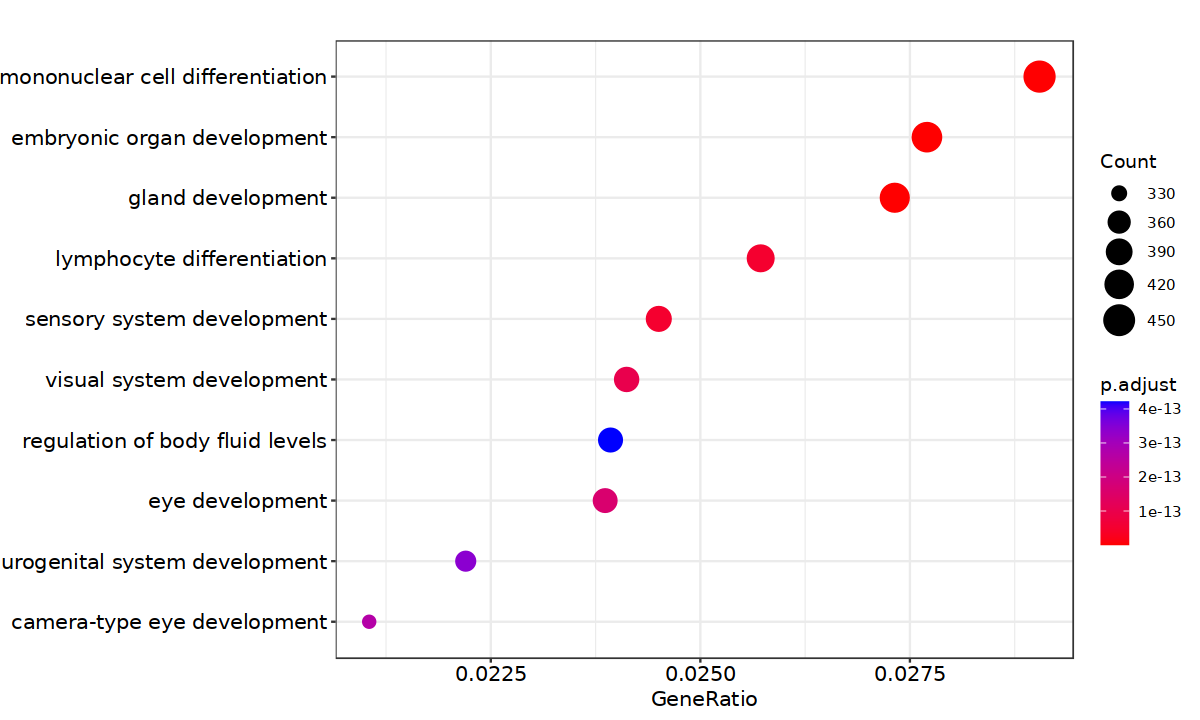

In [49]:
ego_bp_up<-enrichGO(gene       = gene_all,
                 OrgDb      = org.Hs.eg.db,
                 keyType    = 'ENTREZID',
                 ont        = "BP",
                 pAdjustMethod = "BH",
                 pvalueCutoff = 0.01,#0.01
                 qvalueCutoff = 0.05)

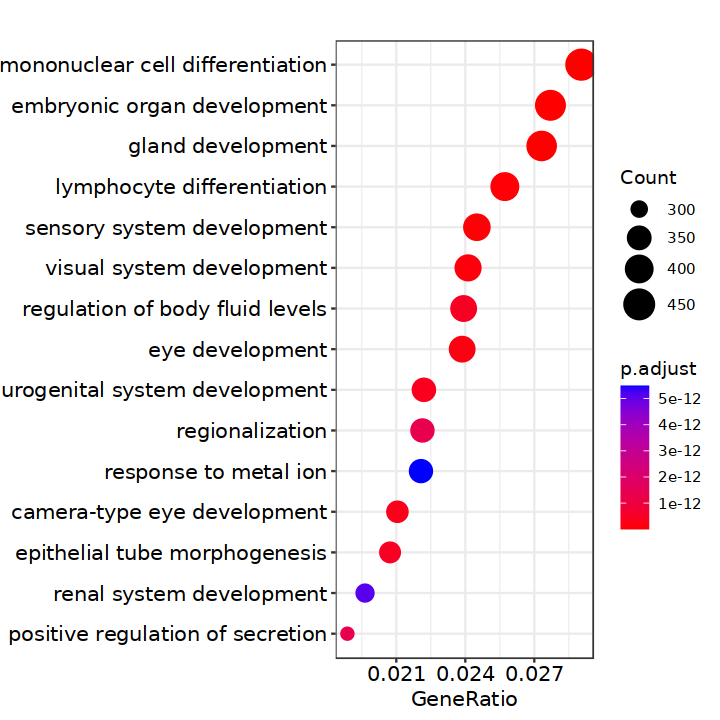

In [51]:
options(repr.plot.width = 6,repr.plot.height =6)
dotplot(ego_bp_up,showCategory = 15,label_format=100)

In [52]:
library(GSEABase)
library(limma) 
library(clusterProfiler)
library(enrichplot)

Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: annotate

Warning message:
"package 'annotate' was built under R version 4.2.2"
Loading required package: XML

Loading required package: graph

Warning message:
"package 'graph' was built under R version 4.2.3"

Attaching package: 'graph'


The following object is masked from 'package:XML':

    addNode


Warning message:
"package 'enrichplot' was built under R version 4.2.2"


In [53]:
geneList <- deg$logFC
names(geneList) <- toupper(rownames(deg))
geneList <- sort(geneList,decreasing = T)

In [55]:
geneset <- read.gmt("/import/liujing/data2/kegg.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=0 )

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.14% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


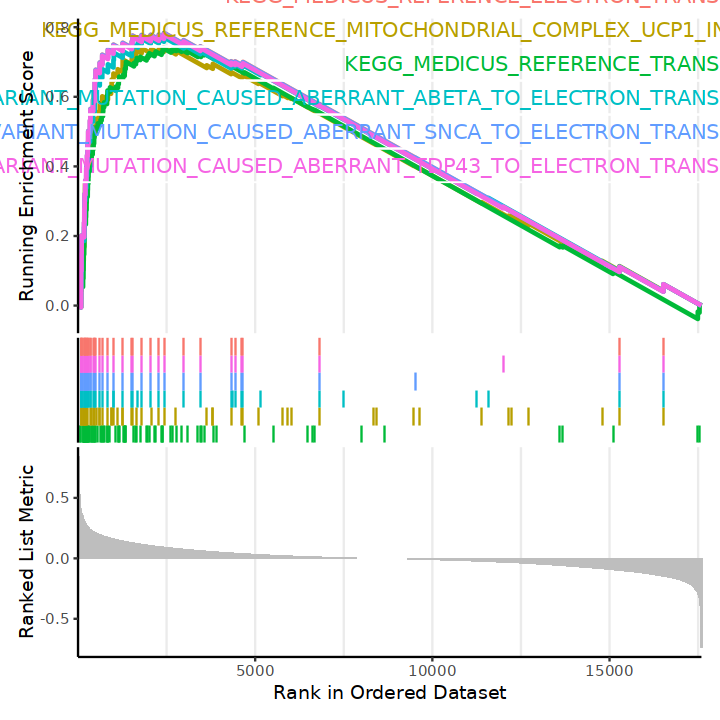

In [56]:
gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1:6],
         pvalue_table = TRUE)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.14% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
"For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation."


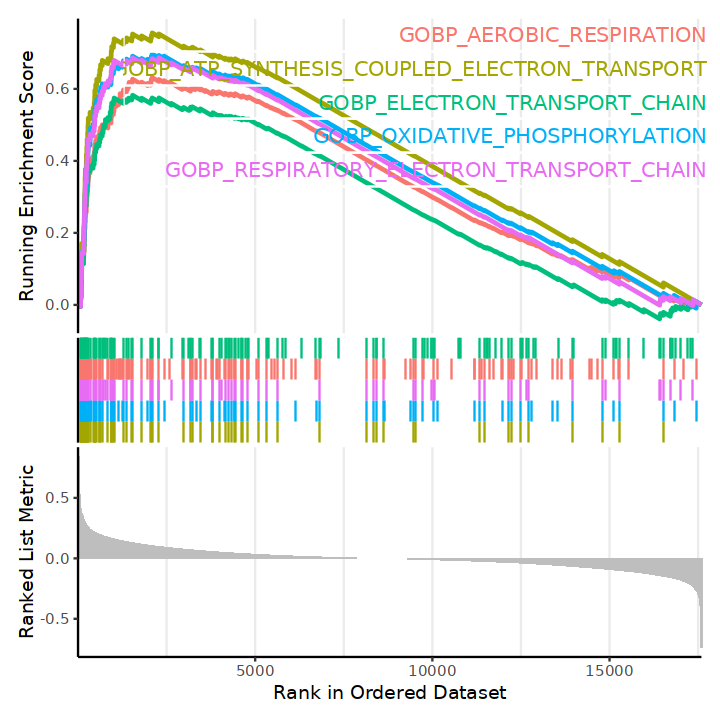

In [58]:
geneset <- read.gmt("/import/liujing/data2/bp.gmt")

gsea_results <- GSEA(
   geneList = geneList,
   TERM2GENE = geneset,
  verbose = F,
  eps=1e-10 )

gseaplot2(gsea_results,
          gsea_results@result[["ID"]][1:5],
         pvalue_table = TRUE)

### 臨床特徵

In [61]:
load('cliinfo.rda')

In [64]:
data1 = data %>%  tibble::rownames_to_column(.,'V1')

In [68]:
daaa = left_join(group1,cliinfo,by = 'V1')

In [70]:
colnames(daaa) = c('sample','group','age','type','sex','id','loc')

In [72]:
head(daaa,2)

,sample,group,age,type,sex,id,loc
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,SL32230,1,48,MD,F,X3004,DLPFC
2,SL32231,1,46,MD,M,X3064,DLPFC


In [74]:
daaa$age = ifelse(daaa$age >= 40,'>=40','<40' )

In [75]:
table(daaa$sex)


 F  M 
 6 17 

In [76]:
table(daaa$age)


 <40 >=40 
   6   17 

In [79]:
library(ggstatsplot)
library(ggplot2)
library(dplyr)

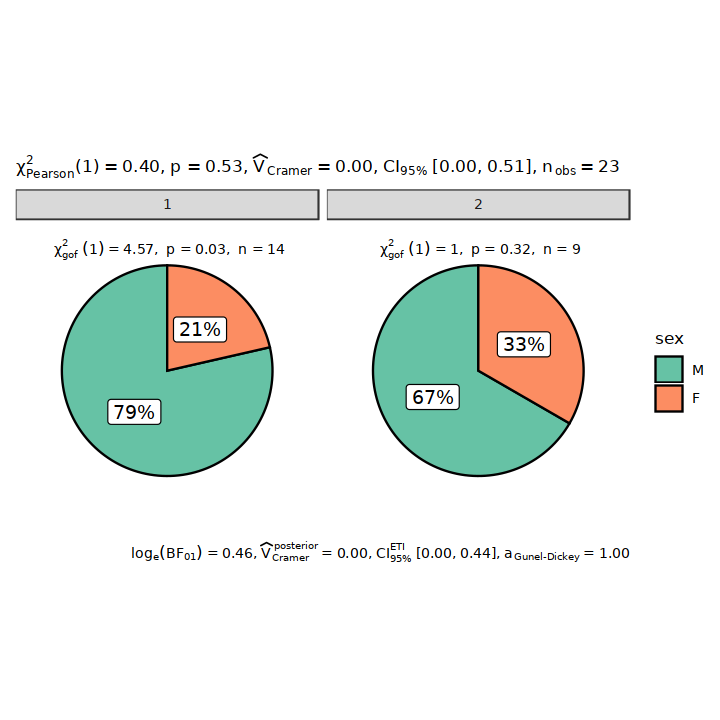

In [84]:
ggpiestats(daaa, sex,  group,palette = 'Set2')

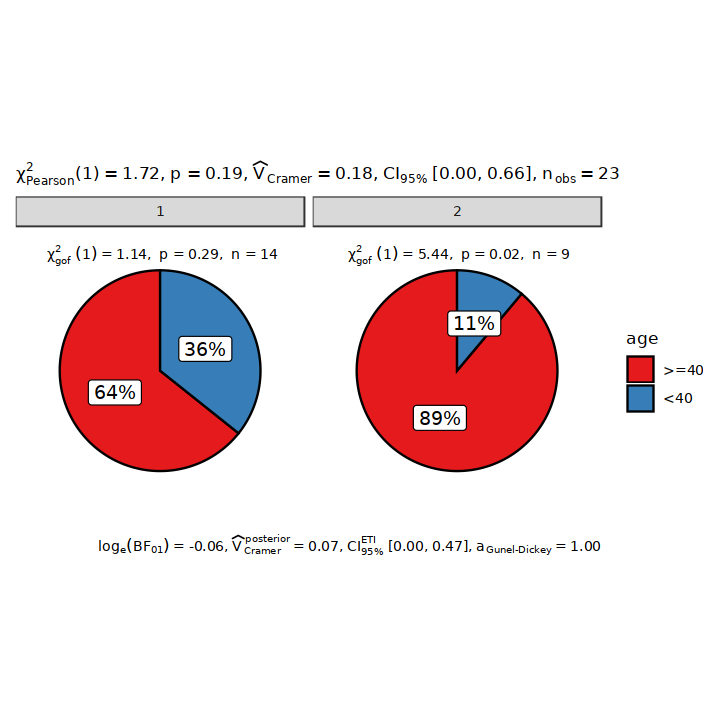

In [86]:
ggpiestats(daaa,age,  group, palette = 'Set1')